In [93]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [111]:
df = pd.read_pickle('data/EPMC/ffs_or_predecessors.pkl')
df.set_index('pmid',inplace=True)
df = df[~df.index.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1563 entries, 29423837 to 23245609
Data columns (total 14 columns):
abstractText            1471 non-null object
authorList              1561 non-null object
chemicalList            916 non-null object
citedByCount            1563 non-null int64
doi                     1510 non-null object
firstPublicationDate    1563 non-null object
grantsList              1419 non-null object
id                      1563 non-null object
journalInfo             1563 non-null object
keywordList             433 non-null object
meshHeadingList         1345 non-null object
pmcid                   1254 non-null object
pubYear                 1563 non-null object
title                   1563 non-null object
dtypes: int64(1), object(13)
memory usage: 183.2+ KB


In [64]:
# no. citation stats
display(df['citedByCount'].describe())

# proportion of papers with at least one citation
(df['citedByCount']>0).value_counts(normalize=True)

count    1563.000000
mean       21.726168
std        83.966569
min         0.000000
25%         2.000000
50%         8.000000
75%        22.000000
max      3068.000000
Name: citedByCount, dtype: float64

True     0.897633
False    0.102367
Name: citedByCount, dtype: float64

In [65]:
df.loc[df['citedByCount']>0,'citedByCount'].describe()

count    1403.000000
mean       24.203849
std        88.289191
min         1.000000
25%         4.000000
50%        10.000000
75%        25.000000
max      3068.000000
Name: citedByCount, dtype: float64

In [66]:
with pd.option_context('display.max_colwidth', -1):
    # top 10 papers with most citations
    display(df[['citedByCount','title']].sort_values(by='citedByCount',ascending=False).head(40))
    
    # paper with most citations
    display(df.loc[df['citedByCount']==df['citedByCount'].max(),
                  ['title','authorString','grantsList','journalInfo']].T)

,citedByCount,title
pmid,,
23245609,3068,"A comparative risk assessment of burden of disease and injury attributable to 67 risk factors and risk factor clusters in 21 regions, 1990-2010: a systematic analysis for the Global Burden of Disease Study 2010."
17051153,292,Corneal avascularity is due to soluble VEGF receptor-1.
15558062,283,Light-activated ion channels for remote control of neuronal firing.
22108672,271,Normalization as a canonical neural computation.
24217912,269,The Human Phenotype Ontology project: linking molecular biology and disease through phenotype data.
16452172,250,Drusen complement components C3a and C5a promote choroidal neovascularization.
12727870,238,A conserved ER targeting motif in three families of lipid binding proteins and in Opi1p binds VAP.
15153612,222,Characterization of putative stem cell phenotype in human limbal epithelia.
24439297,221,Retinal gene therapy in patients with choroideremia: initial findings from a phase 1/2 clinical trial.


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


pmid,23245609
title,"A comparative risk assessment of burden of disease and injury attributable to 67 risk factors and risk factor clusters in 21 regions, 1990-2010: a systematic analysis for the Global Burden of Disease Study 2010."
authorString,NaN
grantsList,"[{'grantId': 'ES00260', 'agency': 'NIEHS NIH HHS', 'acronym': 'ES', 'orderIn': 0}, {'grantId': 'G0801056B', 'agency': 'Medical Research Council', 'orderIn': 0}, {'grantId': 'MC_U137686857', 'agency': 'Medical Research Council', 'orderIn': 0}, {'grantId': 'P30 DK048520', 'agency': 'NIDDK NIH HHS', 'acronym': 'DK', 'orderIn': 0}, {'agency': 'Medical Research Council', 'orderIn': 0}, {'grantId': 'RC1 AG035616', 'agency': 'NIA NIH HHS', 'acronym': 'AG', 'orderIn': 0}, {'agency': 'Cancer Research UK', 'orderIn': 0}, {'agency': 'Intramural NIH HHS', 'orderIn': 0}, {'grantId': 'P30 ES000260', 'agency': 'NIEHS NIH HHS', 'acronym': 'ES', 'orderIn': 0}]"
journalInfo,"{'issue': '9859', 'volume': '380', 'journalIssueId': 2008746, 'dateOfPublication': '2012 Dec', 'monthOfPublication': 12, 'yearOfPublication': 2012, 'printPublicationDate': '2012-12-01', 'journal': {'title': 'Lancet (London, England)', 'medlineAbbreviation': 'Lancet', 'isoabbreviation': 'Lancet', 'nlmid': '2985213R', 'essn': '1474-547X', 'issn': '0140-6736'}}"


In [29]:
def get_ffs_grant_ids(grantsList):
    ids = [grant['grantId'] for grant in grantsList if 'Fight for Sight' in grant['agency']]
    return ids

def get_grant_agencies(grantsList):
    agencies = [grant['agency'] for grant in grantsList]
    return list(set(agencies))

def get_affiliations(authorList):
    if type(authorList) is list:
        authors = [author for author in authorList if type(author) is dict]
        affiliations = [author['affiliation'] for author in authors if 'affiliation' in author.keys()]
        
        # remove email addresses
        affiliations = [' '.join([word for word in affiliation.split() if '@' not in word]) for affiliation in affiliations]
        affiliations = [affiliation.replace('Electronic address:','') for affiliation in affiliations]

        # split lists of multiple affiliations
        affiliations = [re.split('\d\] | \[\d\] | \;',affiliation) for affiliation in affiliations]
        affiliations = [item for sublist in affiliations for item in sublist]
        
        # strip white space and punctuation
        affiliations = [re.sub(r'[^\w\s,]+','',affiliation) for affiliation in affiliations] # anything not word,whitespace,comma
        affiliations = [re.sub(r'^\d+','',affiliation) for affiliation in affiliations] # leading digits
        affiliations = [affiliation.strip() for affiliation in affiliations]
        
        # try to deal with long addresses
        affiliations = [','.join(re.split(r'\,',affiliation)[:4]) for affiliation in affiliations if len(re.split(r'\,',affiliation))>4]
        
        return list(set(affiliations))
    else:
        return []
    
df['FFS_IDs'] = df['grantsList'].apply(get_ffs_grant_ids)
df['fundingAgencies'] = df['grantsList'].apply(get_grant_agencies)
df['affiliations'] = df['authorList'].apply(get_affiliations)

TypeError: 'float' object is not iterable

In [ ]:
agencies = [agency for agency_list in df['fundingAgencies'] for agency in agency_list]
agencies = sorted(list(set(agencies)))

grants = [grant for grant_list in df['FFS_IDs'] for grant in grant_list]
grants = sorted(list(set(grants)))

affiliations = [affiliation for affiliations_list in df['affiliations'] for affiliation in affiliations_list]
affiliations = sorted(list(set(affiliations)))
len(affiliations)

In [ ]:
sorted(affiliations)

In [ ]:
'''
def lists_of_dict_to_df(series):
    df = None
    for idx,list_of_dicts in series[series.notna()].iteritems():
        new_rows = pd.DataFrame(list_of_dicts)
        new_rows['pmid'] = idx
        
        if df is None:
            df = pd.DataFrame(new_rows)
        else:
            df = df.append(new_rows,ignore_index=True,sort=False)
        
    return df

authors = lists_of_dict_to_df(df['authorList'])
display(authors.head())

grants = lists_of_dict_to_df(df['grantsList'])
display(grants.head())

# most frequent authors
authors['fullName'].value_counts().head(10)
'''

In [7]:
max(df['FFS_IDs'].apply(len))


KeyError: 'FFS_IDs'

In [112]:
df['firstPublicationDate'] = pd.to_datetime(df['firstPublicationDate'])
df['pubYear'] = df['firstPublicationDate'].dt.year.astype(int)

In [54]:
((df['pubYear']>2007) & (df['citedByCount']<50) & (df['pubYear']<2018)).sum()

1218

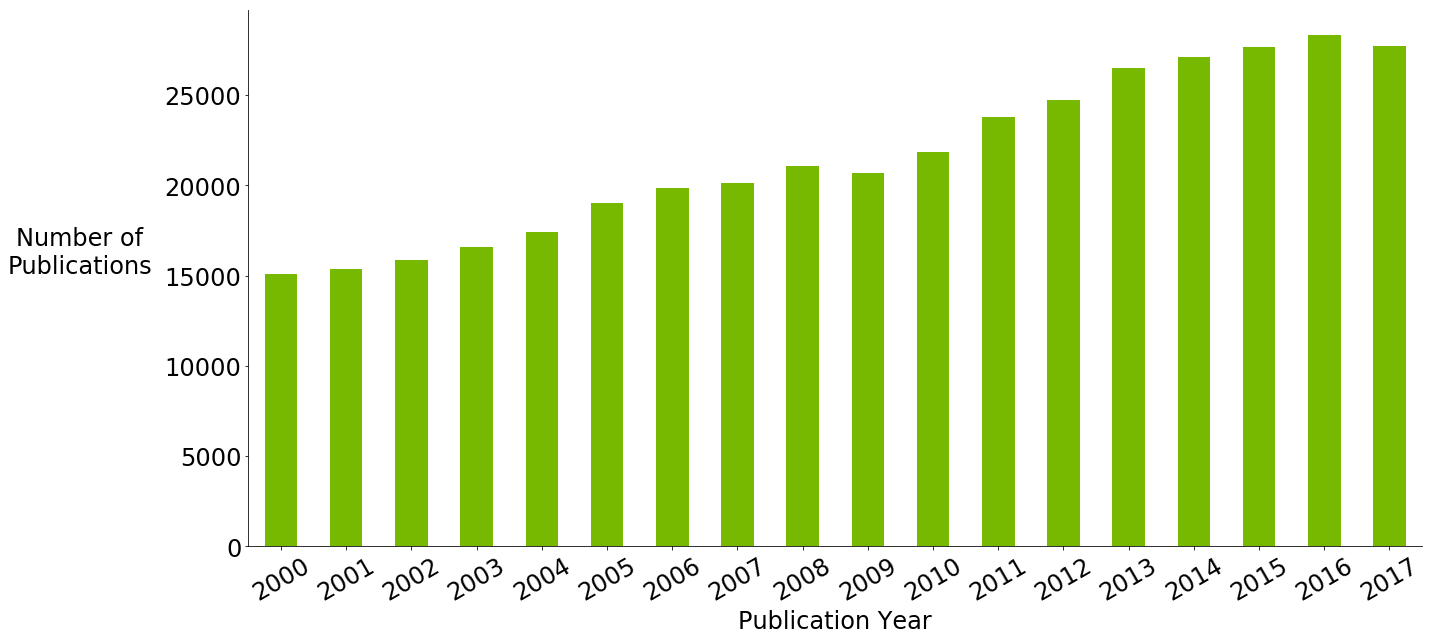

In [89]:
plt.figure(figsize=(20,9))
ax = df[df.pubYear<2018].groupby('pubYear').pubYear.count().plot.bar(color='#77b800',rot=30,fontsize=24)
plt.xlabel('Publication Year',fontsize=24)
plt.ylabel('Number of\nPublications',fontsize=24,rotation=0, labelpad=85)
#plt.ylim([0,30000])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
plt.savefig('plots/epmc/kw_pub_per_year.png',dpi=300)


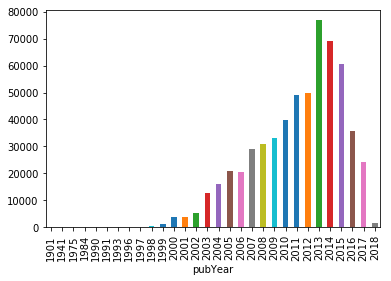

In [33]:
df.groupby('pubYear')['citedByCount'].sum().plot.bar()

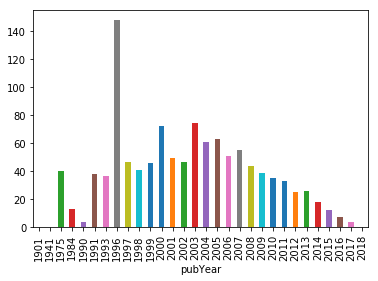

In [34]:
df.groupby('pubYear')['citedByCount'].mean().plot.bar()

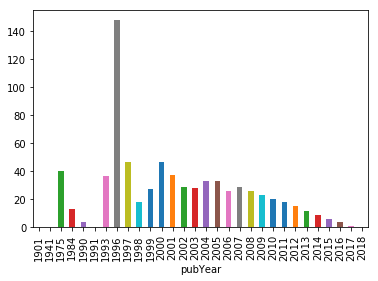

In [35]:
df.groupby('pubYear')['citedByCount'].median().plot.bar()

(0, 50)

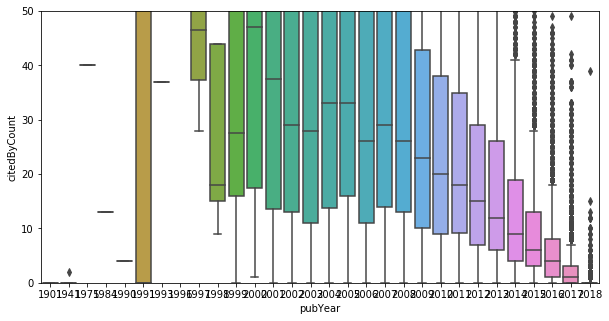

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pubYear',y='citedByCount',data=df)
plt.ylim([0,50])

In [37]:
num_papers_per_agency = dict()
for agency in [agency for agency in agencies if agency!='Fight for Sight']:
    num_papers_per_agency[agency] = sum([agency in row for row in df['fundingAgencies']])
    
num_papers_per_agency = pd.Series(num_papers_per_agency)

plt.figure(figsize=(5,10))
num_papers_per_agency.sort_values(ascending=False).head(20).plot.barh()

num_papers_per_agency[num_papers_per_agency>1].sort_values(ascending=False)

NameError: name 'agencies' is not defined

In [38]:
num_papers_per_affiliation = dict()
for affiliation in affiliations:
    num_papers_per_affiliation[affiliation] = sum([affiliation in row for row in df['affiliations']])
    
num_papers_per_affiliation = pd.Series(num_papers_per_affiliation)

#plt.figure(figsize=(5,10))
#num_papers_per_affiliation.sort_values(ascending=False).head(20).plot.barh()

num_papers_per_affiliation.sort_values(ascending=False).head(20)

NameError: name 'affiliations' is not defined

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


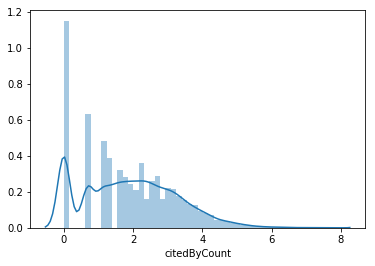

In [39]:
sns.distplot(np.log1p(df['citedByCount']))

In [43]:
df['citedByCount'].describe()

count    34545.000000
mean        16.928789
std         47.937432
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max       2263.000000
Name: citedByCount, dtype: float64

In [113]:
cited_bins = pd.cut(df['citedByCount'],[-0.5, 0.5, 3.5, 7.5, 17.5, 9999999], labels=['0','1 to 3','4 to 7','8 to 17','More than 17'])

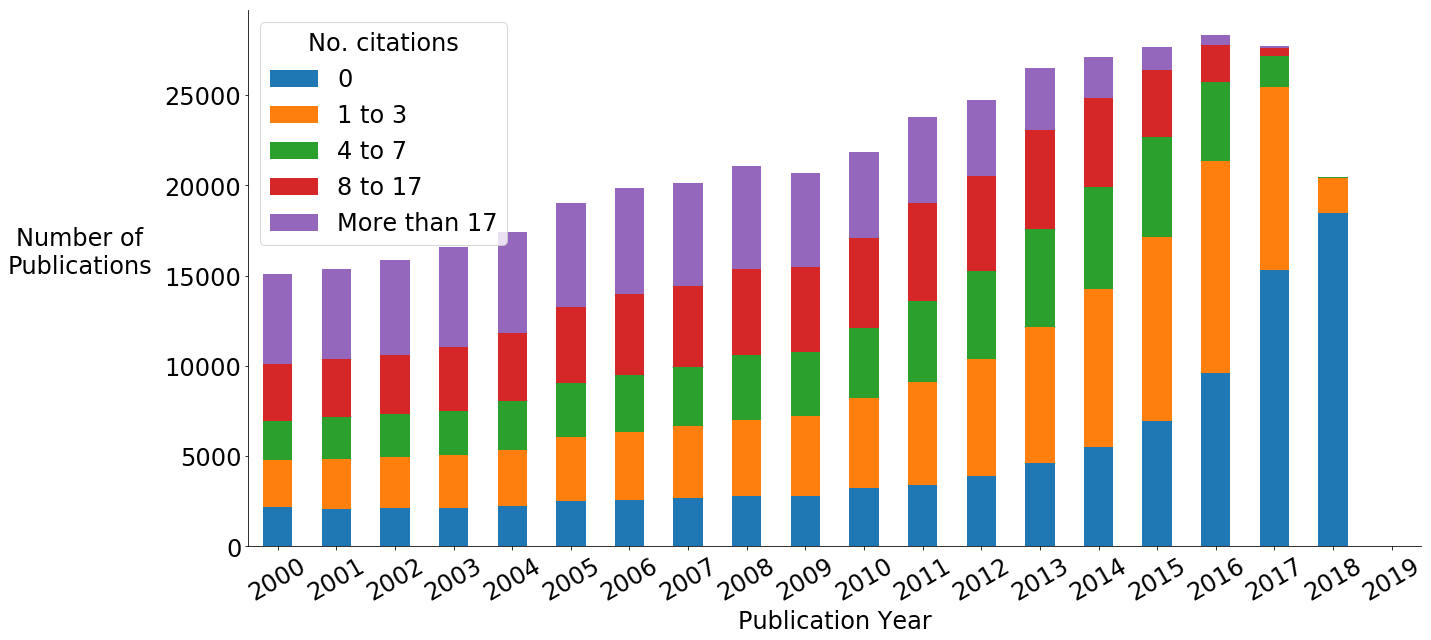

In [91]:
ax = plt.figure(figsize=(20,9)).gca()
cited_bins.groupby(df['pubYear']).value_counts(normalize=False,sort=False).unstack(fill_value=0).plot.bar(stacked=True,ax=ax,rot=30,fontsize=24)

plt.xlabel('Publication Year',fontsize=24)
plt.ylabel('Number of\nPublications',fontsize=24,rotation=0, labelpad=85)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
legend = plt.legend(title='No. citations',fontsize=24)
plt.setp(legend.get_title(),fontsize=24)

plt.tight_layout()
plt.savefig('plots/epmc/kw_pub_per_year_citations.png',dpi=300)


In [114]:
cited_bins_ffs = cited_bins.groupby(df['pubYear']).value_counts(normalize=True,sort=False).unstack(fill_value=0)

In [92]:
cited_bins_eyekw = cited_bins.groupby(df['pubYear']).value_counts(normalize=True,sort=False).unstack(fill_value=0)

In [115]:
cited_bins_ffs = cited_bins.copy()

In [103]:
cited_bins_eyekw = cited_bins.copy()

Text(0.5,0,'')

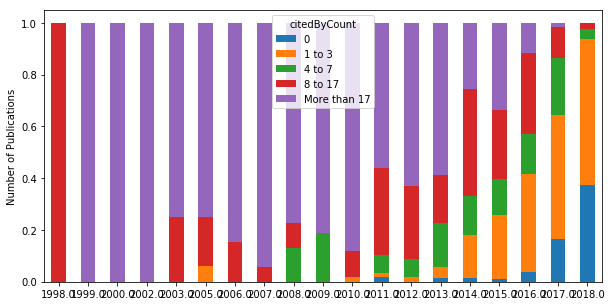

In [61]:
ax = plt.figure(figsize=(10,5)).gca()
cited_bins_ffs.plot.bar(stacked=True,ax=ax,rot=0)
plt.ylabel('Number of Publications')
plt.xlabel('')

In [108]:
cited_bins_eyekw.value_counts(sort=False,normalize=True)

0               0.232180
1 to 3          0.248736
4 to 7          0.158008
8 to 17         0.175263
More than 17    0.185814
Name: citedByCount, dtype: float64

In [116]:
cited_bins_ffs.value_counts(sort=False,normalize=True)

0               0.102367
1 to 3          0.197697
4 to 7          0.166987
8 to 17         0.225208
More than 17    0.307742
Name: citedByCount, dtype: float64

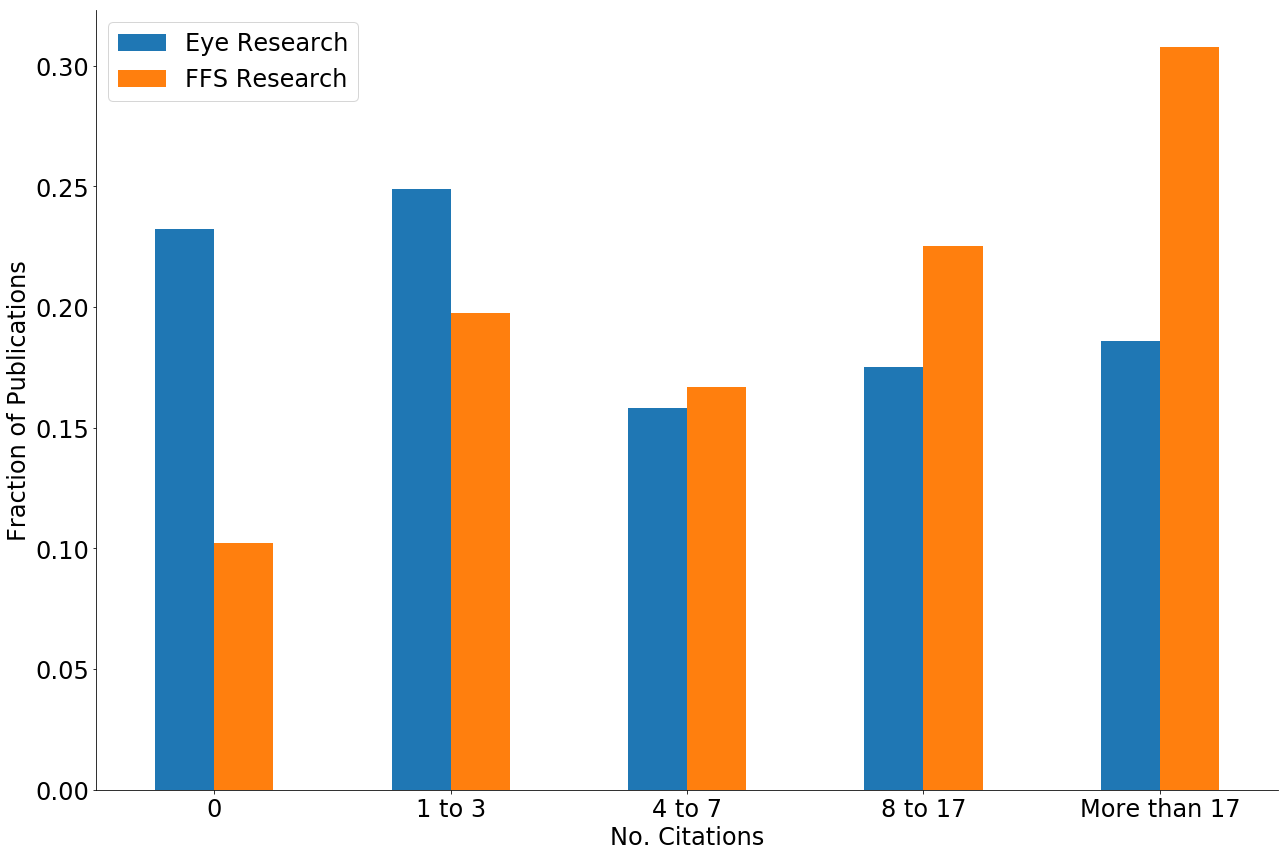

In [125]:
cited_comp = pd.DataFrame({'Eye Research':cited_bins_eyekw.value_counts(normalize=True),'FFS Research':cited_bins_ffs.value_counts(normalize=True)})

ax = plt.figure(figsize=(18,12)).gca()
cited_comp.plot.bar(ax=ax,fontsize=24,rot=0)

plt.xlabel('No. Citations',fontsize=24)
plt.ylabel('Fraction of Publications',fontsize=24)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.legend(fontsize=24)

plt.tight_layout()
plt.savefig('plots/epmc/citations_comparison.png',dpi=300)

Text(0.5,1,'FIGHT FOR SIGHT RESEARCH')

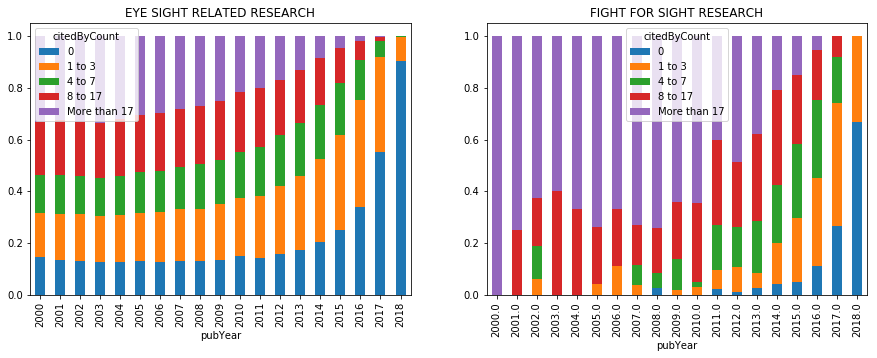

In [98]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
cited_bins_eyekw[(cited_bins_eyekw.index>1999) & (cited_bins_eyekw.index<2019)].plot.bar(ax=ax,stacked=True)
plt.title('EYE SIGHT RELATED RESEARCH')

ax=plt.subplot(1,2,2)
cited_bins_ffs[(cited_bins_ffs.index>1999) & (cited_bins_ffs.index<2019)].plot.bar(ax=ax,stacked=True)
plt.title('FIGHT FOR SIGHT RESEARCH')


In [51]:
cited_bins_eyekw

citedByCount,0,1 to 3,4 to 7,8 to 17,More than 17
pubYear,,,,,
1901,1.000000,0.000000,0.000000,0.000000,0.000000
1941,0.916667,0.083333,0.000000,0.000000,0.000000
1975,0.000000,0.000000,0.000000,0.000000,1.000000
1984,0.000000,0.000000,0.000000,1.000000,0.000000
1990,0.000000,0.000000,1.000000,0.000000,0.000000
1991,0.666667,0.000000,0.000000,0.000000,0.333333
1993,0.000000,0.000000,0.000000,0.000000,1.000000
1996,0.000000,0.000000,0.000000,0.000000,1.000000
1997,0.000000,0.000000,0.000000,0.000000,1.000000
